## Replication for "Asymmetry by Design", November 4, 2020
### By Adam Goldstein and Charlie Eaton

### Figure A4: Estimates of Graduation Rate Trajectories Among Acquired Campuses, by Acquiring Firm’s Identity Structure 

In [1]:
*ssc install gr0070



  Variables that uniquely identify margins: multi_brand change_systemid


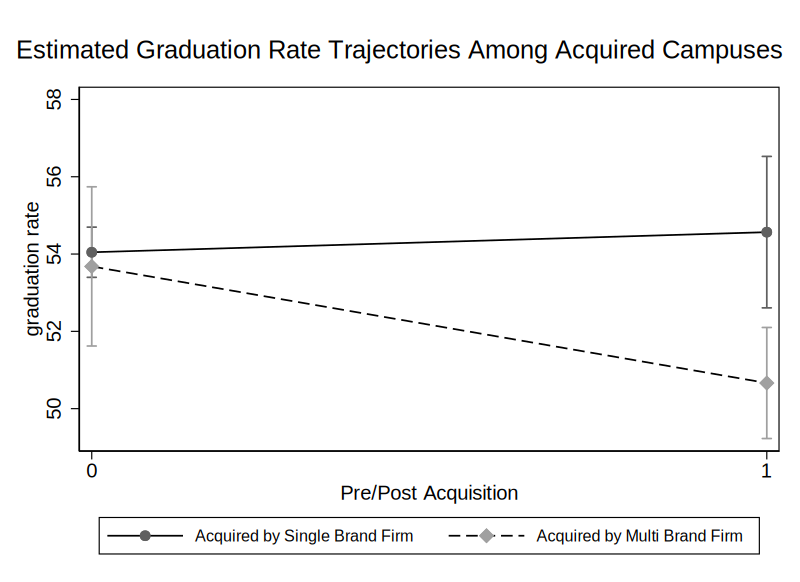

In [2]:
quietly {
quietly use data/d_unitidasymmetry, clear
quietly set scheme s1mono
quietly set more off

    sort unitid year
by unitid: gen change_systemid= 1 if systemid!=l.systemid & l.systemid!=.
by unitid: carryforward change_systemid, replace
recode change_systemid .=0
bys systemid year: egen any_change_systemid= min(change_systemid)
gen campus=1 if total_enrollment_log!=.
bysort systemid: egen sys_campuses=total(campus)

label define multi_brand 0 "Acquired by Single Brand Firm" 1 "Acquired by Multi Brand Firm"
label val multi_brand multi_brand

reghdfe grad_rate_150_p_w i.change_systemid##i.multi_brand system_under all_under ///
 pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w ///
    online selective i.iclevel dpcttype*, absorb(unitid year) cluster(unitid)
	margins i.multi_brand#i.change_systemid
	marginsplot, xdim(change_systemid) title("Estimated Graduation Rate Trajectories Among Acquired Campuses", margin(medium)) xtitle("Pre/Post Acquisition") ytitle(graduation rate) legend(size(small))

graph export figures/fa4_asymmetryrebranded.pdf, replace
}

*Note on result: Even among those campuses which were bought out by expanding firms, we see significant differences in student outcomes as a function of the acquired campus' role in the acquiring firms' brand structure. 

When acquiring firms incorporate a new campus into the firm's existing identity (rebranding the acquired campus), there is no decline in realized graduation rates for subsequent cohorts at that campus.

Campuses which are acquired and retain theur old name (thereby further diversifying the firm's identity), see an approximately four percentage point decline in subsequent cohorts' graduation rates, controlling for over-time changes in student composition and degree type offerings. 

This result provides additional evidence that multi-indentity firms engage in extractive behavior in part by laundering the identities of acquired campuses. 